<a href="https://colab.research.google.com/github/HO94/InsightMining_HonGong/blob/main/08_2_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패션 MNIST 데이터 불러오기

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
train_input.shape


(60000, 28, 28)

In [ ]:
train_target.shape

(60000,)

In [ ]:
test_input.shape

(10000, 28, 28)

In [ ]:
test_target.shape

(10000,)

In [ ]:
train_scaled.shape

(60000, 28, 28, 1)

In [ ]:
train_scaled.shape

(48000, 28, 28, 1)

In [ ]:
val_scaled.shape

(12000, 28, 28, 1)

In [ ]:
train_target.shape

(48000,)

In [ ]:
val_scaled.shape

(12000, 28, 28, 1)

# 합성곱 신경망 만들기

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [ ]:
model.add(keras.layers.MaxPool2D(2))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

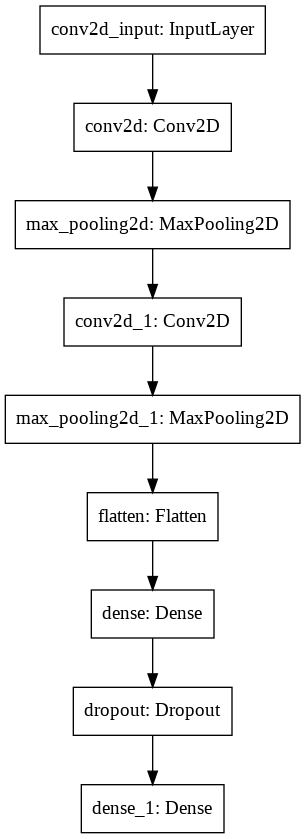

In [ ]:
keras.utils.plot_model(model)

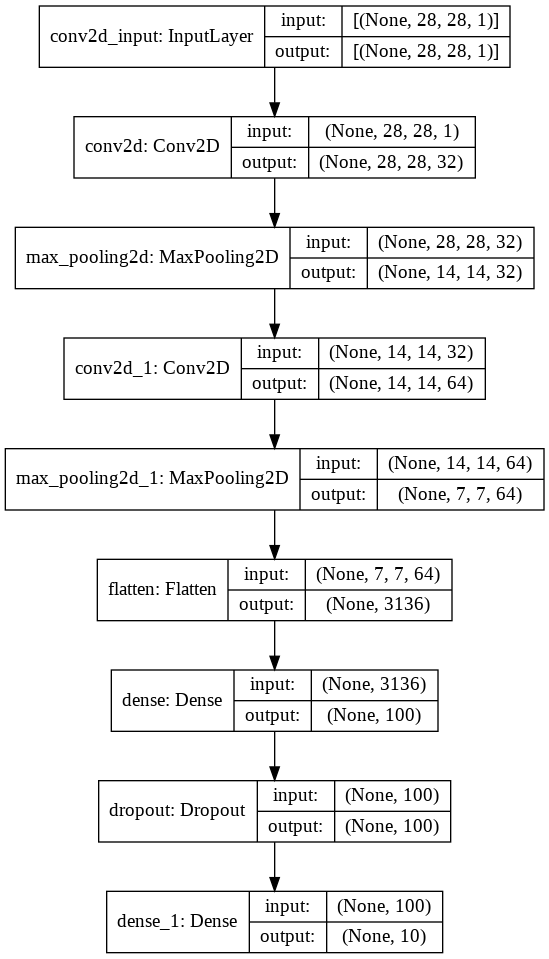

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

# 모델 컴파일과 훈련

케라스 API의 장점 : 딥러닝 모델의 종류나 구성 방식에 상관없이 컴파일과 훈련 과정이 동일

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 67s 44ms/step - loss: 0.7320 - accuracy: 0.7402 - val_loss: 0.3211 - val_accuracy: 0.8804
Epoch 2/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.3601 - accuracy: 0.8711 - val_loss: 0.2718 - val_accuracy: 0.8979
Epoch 3/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2965 - accuracy: 0.8935 - val_loss: 0.2500 - val_accuracy: 0.9043
Epoch 4/20
1500/1500 [==============================] - 65s 44ms/step - loss: 0.2665 - accuracy: 0.9030 - val_loss: 0.2354 - val_accuracy: 0.9097
Epoch 5/20
1500/1500 [==============================] - 67s 44ms/step - loss: 0.2413 - accuracy: 0.9114 - val_loss: 0.2373 - val_accuracy: 0.9099
Epoch 6/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2180 - accuracy: 0.9210 - val_loss: 0.2266 - val_accuracy: 0.9177
Epoch 7/20
1500/1500 [==============================] - 65s 44ms/step - loss: 0.1978 - accuracy: 0.9274 - val_loss: 0.2241 -

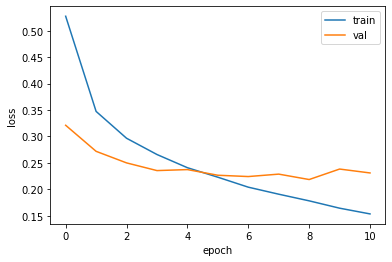

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 11ms/step - loss: 0.2185 - accuracy: 0.9215


[0.21848447620868683, 0.921500027179718]

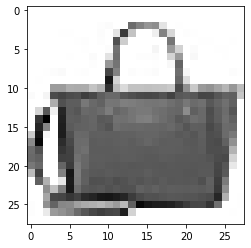

In [ ]:
plt.imshow(val_scaled[0].reshape(28,28), cmap = 'gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[2.7842719e-16 2.2322718e-24 1.4994736e-21 9.8821432e-23 7.1570624e-19
  1.8012063e-20 7.9268387e-17 1.3843227e-22 1.0000000e+00 5.5328907e-19]]


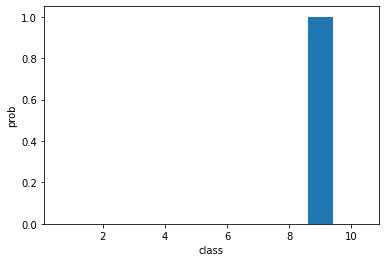

In [ ]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2372 - accuracy: 0.9155


[0.2371772974729538, 0.9154999852180481]